# Описание данных
<br />Таблица visits (лог сервера с информацией о посещениях сайта):<br />
<br />Uid — уникальный идентификатор пользователя<br />
<br />Device — категория устройства пользователя<br />
<br />Start Ts — дата и время начала сессии<br />
<br />End Ts — дата и время окончания сессии<br />
<br />Source Id — идентификатор рекламного источника, из которого пришел пользователь<br />
<br />Таблица orders (информация о заказах):<br />
<br />Uid — уникальный id пользователя, который сделал заказ<br />
<br />Buy Ts — дата и время заказа<br />
<br />Revenue — выручка Яндекс.Афиши с этого заказа<br />
<br />Таблица costs (информация о затратах на маркетинг):<br />
<br />source_id — идентификатор рекламного источника<br />
<br />dt — дата<br />
<br />costs — затраты на этот рекламный источник в этот день<br />

# Цель исследования.
Помочь маркетологам оптимизировать маркетинговые затраты.

# Основные вопросы исследования.
<br />Сколько людей пользуются в день, неделю, месяц?<br />
<br />Сколько сессий в день?<br />
<br />Сколько длится одна сессия?<br />
<br />Как часто люди возвращаются?<br />
<br />Когда люди начинают покупать?<br />
<br />Сколько раз покупают за период?<br />
<br />Какой средний чек?<br />
<br />Сколько денег приносят? (LTV)<br />
<br />Сколько денег потратили? Всего / на каждый источник / по времени<br />
<br />Сколько стоило привлечение одного покупателя из каждого источника?<br />
<br />На сколько окупились расходы? (ROI)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

**Предобработка данных**,

In [2]:
visits = pd.read_csv('visits_log.csv')

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits = visits.rename(columns={"End Ts": "end", "Source Id": "source", "Start Ts": "start","Device": "device", "Uid": "uid"})
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   device  359400 non-null  object        
 1   end     359400 non-null  datetime64[ns]
 2   source  359400 non-null  int64         
 3   start   359400 non-null  datetime64[ns]
 4   uid     359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [7]:
orders = pd.read_csv('orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders = orders.rename(columns={"Buy Ts": "buy", "Revenue": "revenue", "Uid": "uid"})
orders['buy'] = pd.to_datetime(orders['buy'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy      50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
costs = pd.read_csv('costs.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [12]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Выясним сколько людей пользуются в день, неделю, месяц?**

In [13]:
visits['duration'] = (visits['end'] - visits['start']).dt.total_seconds()
visits.head()

,device,end,source,start,uid,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0


In [14]:
visitscohort = visits.groupby('uid')['start'].min().reset_index()


In [15]:
visitscohort.columns = ['uid', 'firststart']

In [16]:
visits = pd.merge(visits, visitscohort, on = 'uid')
visits['firstmonth'] = visits['firststart'].astype('datetime64[M]')
visits['firstday'] = visits['firststart'].astype('datetime64[D]')
visits['firstweek'] = visits['firststart'].astype('datetime64[W]')
visits.head()

,device,end,source,start,uid,duration,firststart,firstmonth,firstday,firstweek
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017-12-20 17:20:00,2017-12-01,2017-12-20,2017-12-14
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,2018-02-19 16:53:00,2018-02-01,2018-02-19,2018-02-15
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-06-29
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08


In [17]:
visits['session_year'] = visits['start'].dt.year
visits['session_month'] = visits['start'].dt.month
visits['session_week'] = visits['start'].dt.week
visits['session_date'] = visits['start'].dt.date

In [18]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [19]:
dau_total

uid    907.991758
dtype: float64

**908 - это среднее кол-во уникальных пользователей в день за весь срок. Найдем среднее в неделю**

In [20]:
wau_total

uid    5716.245283
dtype: float64

**5716 - это среднее в неделю**

In [21]:
mau_total

uid    23228.416667
dtype: float64

**23228 - это среднее в месяц**

**Пересчитал показатели с учетом замечания**

Найдем среднее кол-во сессий в день, ее среднюю продолжительность

In [22]:
visits.groupby(['firstmonth', 'firstday']).agg({'duration':'mean', 'uid':'count'})['uid'].mean()

987.3626373626373

987 - это среднее кол-во сессий в день

In [23]:
visits.groupby(['firstmonth', 'firstday']).agg({'duration':'mean', 'uid':'count'})['duration'].mean()

603.3019743583721

603 секунды - ровно столько длится среднее время пользования продуктом в день

In [24]:
visits['duration'].mean()

643.0256872565387

643 секунды - это средняя продолжительность сессии

In [25]:
visits['duration'].describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: duration, dtype: float64

**Видим, что в длительности сессии бывают выбросы, достигающие 42660 сек. Поэтому за среднюю продолжительность возьмем медиану - 300 секунд**

Расчитаем retention rate для нашего случая. За когорты примем месяцы

In [26]:
visits

,device,end,source,start,uid,duration,firststart,firstmonth,firstday,firstweek,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017-12-20 17:20:00,2017-12-01,2017-12-20,2017-12-14,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,2018-02-19 16:53:00,2018-02-01,2018-02-19,2018-02-15,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-06-29,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,5,20,2018-05-20
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,3,10,2018-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,480.0,2018-04-23 21:11:00,2018-04-01,2018-04-23,2018-04-19,2018,4,17,2018-04-23
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,0.0,2017-11-08 13:39:00,2017-11-01,2017-11-08,2017-11-02,2017,11,45,2017-11-08
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,1080.0,2017-07-31 12:13:00,2017-07-01,2017-07-31,2017-07-27,2017,7,31,2017-07-31
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,840.0,2018-03-20 15:11:00,2018-03-01,2018-03-20,2018-03-15,2018,3,12,2018-03-20


In [27]:
visits['cohort_lifetime'] = visits['start'].astype('datetime64[M]') - visits['firstmonth']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype('int')
visits.head()

,device,end,source,start,uid,duration,firststart,firstmonth,firstday,firstweek,session_year,session_month,session_week,session_date,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017-12-20 17:20:00,2017-12-01,2017-12-20,2017-12-14,2017,12,51,2017-12-20,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,2018-02-19 16:53:00,2018-02-01,2018-02-19,2018-02-15,2018,2,8,2018-02-19,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-06-29,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,5,20,2018-05-20,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,3,10,2018-03-09,0


In [28]:
cohorts = visits.groupby(['firstmonth','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

,firstmonth,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,2,713
2,2017-06-01,3,814
3,2017-06-01,4,909
4,2017-06-01,5,947
...,...,...,...
58,2018-03-01,0,20589
59,2018-03-01,1,861
60,2018-03-01,2,557
61,2018-04-01,0,15709


In [29]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['firstmonth','uid']]
initial_users_count

,firstmonth,uid
0,2017-06-01,13259
10,2017-07-01,13140
19,2017-08-01,10181
28,2017-09-01,16704
34,2017-10-01,25977
41,2017-11-01,27248
46,2017-12-01,25268
51,2018-01-01,22624
55,2018-02-01,22197
58,2018-03-01,20589


In [30]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [31]:
cohorts = cohorts.merge(initial_users_count,on='firstmonth')
cohorts

,firstmonth,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,2,713,13259
2,2017-06-01,3,814,13259
3,2017-06-01,4,909,13259
4,2017-06-01,5,947,13259
...,...,...,...,...
58,2018-03-01,0,20589,20589
59,2018-03-01,1,861,20589
60,2018-03-01,2,557,20589
61,2018-04-01,0,15709,15709


In [32]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

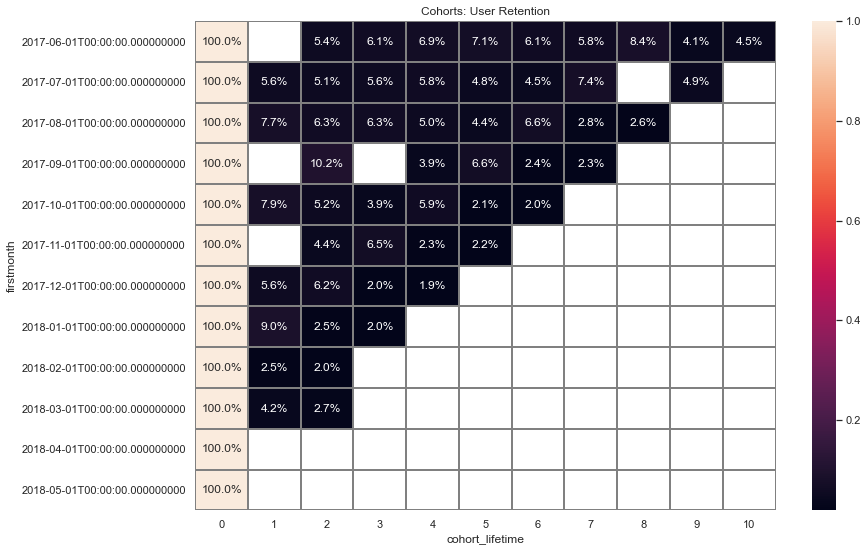

In [33]:
retention_pivot = cohorts.pivot_table(index='firstmonth',columns='cohort_lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

По полученным результатам можем говорить, о том что пользователи достаточно редко возвращаются к нам. Retention rate практически всегда составляет менее 10%

**Ответим на вопрос когда люди начинают покупать?**

In [34]:
orders.head()

,buy,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [35]:
orders.groupby('uid').agg({'buy':'min', 'revenue':'mean'})

,buy,revenue
uid,,
313578113262317,2018-01-03 21:51:00,0.550000
1575281904278712,2017-06-03 10:13:00,1.525000
2429014661409475,2017-10-11 18:33:00,73.330000
2464366381792757,2018-01-28 15:54:00,2.440000
2551852515556206,2017-11-24 10:14:00,5.495000
...,...,...
18445147675727495770,2017-11-24 09:03:00,3.050000
18445407535914413204,2017-09-22 23:55:00,0.293333
18445601152732270159,2018-03-26 22:54:00,4.220000


In [36]:
buy = visits.merge(orders.groupby('uid').agg({'buy':'min', 'revenue':'mean'}), on = 'uid')
buy

,device,end,source,start,uid,duration,firststart,firstmonth,firstday,firstweek,session_year,session_month,session_week,session_date,cohort_lifetime,buy,revenue
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,5,20,2018-05-20,2,2018-03-09 20:25:00,2.330000
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,3,10,2018-03-09,0,2018-03-09 20:25:00,2.330000
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,60.0,2017-09-03 21:35:00,2017-09-01,2017-09-03,2017-08-31,2017,9,35,2017-09-03,0,2017-09-04 12:46:00,1.833333
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2520.0,2017-09-03 21:35:00,2017-09-01,2017-09-03,2017-08-31,2017,10,43,2017-10-27,0,2017-09-04 12:46:00,1.833333
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,1140.0,2017-09-03 21:35:00,2017-09-01,2017-09-03,2017-08-31,2017,9,36,2017-09-04,0,2017-09-04 12:46:00,1.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97389,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,480.0,2017-12-04 12:42:00,2017-12-01,2017-12-04,2017-11-30,2017,12,49,2017-12-04,0,2017-12-04 12:46:00,4.150000
97390,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,660.0,2017-11-20 23:33:00,2017-11-01,2017-11-20,2017-11-16,2017,11,47,2017-11-20,0,2017-11-20 23:43:00,3.670000
97391,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,1260.0,2017-11-29 20:27:00,2017-11-01,2017-11-29,2017-11-23,2017,11,48,2017-11-29,0,2017-11-29 20:33:00,3.050000
97392,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,480.0,2018-04-23 21:11:00,2018-04-01,2018-04-23,2018-04-19,2018,4,17,2018-04-23,0,2018-04-23 21:16:00,0.490000


In [37]:
buy['durationbuy'] = (buy['buy'] - buy['firststart']).dt.total_seconds()

In [38]:
buy['durationbuydays'] = buy['durationbuy'] / (3600*24)

In [39]:
buy['durationbuydays'].describe()

count    97394.000000
mean        33.725839
std         63.346686
min          0.000000
25%          0.006944
50%          1.011806
75%         36.965972
max        363.294444
Name: durationbuydays, dtype: float64

In [40]:
buy

,device,end,source,start,uid,duration,firststart,firstmonth,firstday,firstweek,session_year,session_month,session_week,session_date,cohort_lifetime,buy,revenue,durationbuy,durationbuydays
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,5,20,2018-05-20,2,2018-03-09 20:25:00,2.330000,1200.0,0.013889
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,3,10,2018-03-09,0,2018-03-09 20:25:00,2.330000,1200.0,0.013889
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,60.0,2017-09-03 21:35:00,2017-09-01,2017-09-03,2017-08-31,2017,9,35,2017-09-03,0,2017-09-04 12:46:00,1.833333,54660.0,0.632639
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2520.0,2017-09-03 21:35:00,2017-09-01,2017-09-03,2017-08-31,2017,10,43,2017-10-27,0,2017-09-04 12:46:00,1.833333,54660.0,0.632639
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,1140.0,2017-09-03 21:35:00,2017-09-01,2017-09-03,2017-08-31,2017,9,36,2017-09-04,0,2017-09-04 12:46:00,1.833333,54660.0,0.632639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97389,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,480.0,2017-12-04 12:42:00,2017-12-01,2017-12-04,2017-11-30,2017,12,49,2017-12-04,0,2017-12-04 12:46:00,4.150000,240.0,0.002778
97390,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,660.0,2017-11-20 23:33:00,2017-11-01,2017-11-20,2017-11-16,2017,11,47,2017-11-20,0,2017-11-20 23:43:00,3.670000,600.0,0.006944
97391,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,1260.0,2017-11-29 20:27:00,2017-11-01,2017-11-29,2017-11-23,2017,11,48,2017-11-29,0,2017-11-29 20:33:00,3.050000,360.0,0.004167
97392,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,480.0,2018-04-23 21:11:00,2018-04-01,2018-04-23,2018-04-19,2018,4,17,2018-04-23,0,2018-04-23 21:16:00,0.490000,300.0,0.003472


In [41]:
buy.groupby('uid')['durationbuydays'].min().mean()

16.902899885003553

Делаем вывод о том, что в среднем пользователь оформляет первую покупку на 17 день с момента первого входа.

In [42]:
24*buy.groupby('uid')['durationbuydays'].min().describe()

count    876552.000000
mean        405.669597
std        1129.746245
min           0.000000
25%           0.066667
50%           0.266667
75%          48.283333
max        8719.066667
Name: durationbuydays, dtype: float64

**Медианное же время первой покупки чуть больше четверти часа**

**Ответим на вопрос сколько раз покупают за период?**

In [43]:
buy.groupby('uid')['durationbuydays'].count().mean()

2.6666484133285873

In [44]:
meanorders = buy

In [45]:
meanorders

,device,end,source,start,uid,duration,firststart,firstmonth,firstday,firstweek,session_year,session_month,session_week,session_date,cohort_lifetime,buy,revenue,durationbuy,durationbuydays
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,5,20,2018-05-20,2,2018-03-09 20:25:00,2.330000,1200.0,0.013889
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,3,10,2018-03-09,0,2018-03-09 20:25:00,2.330000,1200.0,0.013889
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,60.0,2017-09-03 21:35:00,2017-09-01,2017-09-03,2017-08-31,2017,9,35,2017-09-03,0,2017-09-04 12:46:00,1.833333,54660.0,0.632639
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2520.0,2017-09-03 21:35:00,2017-09-01,2017-09-03,2017-08-31,2017,10,43,2017-10-27,0,2017-09-04 12:46:00,1.833333,54660.0,0.632639
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,1140.0,2017-09-03 21:35:00,2017-09-01,2017-09-03,2017-08-31,2017,9,36,2017-09-04,0,2017-09-04 12:46:00,1.833333,54660.0,0.632639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97389,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,480.0,2017-12-04 12:42:00,2017-12-01,2017-12-04,2017-11-30,2017,12,49,2017-12-04,0,2017-12-04 12:46:00,4.150000,240.0,0.002778
97390,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,660.0,2017-11-20 23:33:00,2017-11-01,2017-11-20,2017-11-16,2017,11,47,2017-11-20,0,2017-11-20 23:43:00,3.670000,600.0,0.006944
97391,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,1260.0,2017-11-29 20:27:00,2017-11-01,2017-11-29,2017-11-23,2017,11,48,2017-11-29,0,2017-11-29 20:33:00,3.050000,360.0,0.004167
97392,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,480.0,2018-04-23 21:11:00,2018-04-01,2018-04-23,2018-04-19,2018,4,17,2018-04-23,0,2018-04-23 21:16:00,0.490000,300.0,0.003472


In [46]:
meanorderspivot = meanorders.pivot_table(index = ['firstmonth','uid'], columns = 'cohort_lifetime', values = 'durationbuydays', aggfunc = 'count')
meanorderspivot

cohort_lifetime                   0   1    2    3    4    5   6   7    8   \
firstmonth uid                                                              
2017-06-01 1575281904278712      2.0 NaN  NaN  NaN  NaN  NaN NaN NaN  NaN   
           16233238570251706     1.0 NaN  NaN  NaN  NaN  NaN NaN NaN  NaN   
           28094489227360733     4.0 NaN  1.0  3.0  1.0  3.0 NaN NaN  1.0   
           29085576454138824     2.0 NaN  NaN  NaN  NaN  NaN NaN NaN  NaN   
           29340056013621514     1.0 NaN  NaN  NaN  NaN  NaN NaN NaN  1.0   
...                              ...  ..  ...  ...  ...  ...  ..  ..  ...   
2018-05-01 18413403606138337462  1.0 NaN  NaN  NaN  NaN  NaN NaN NaN  NaN   
           18417227789295707563  1.0 NaN  NaN  NaN  NaN  NaN NaN NaN  NaN   
           18418973552381796231  1.0 NaN  NaN  NaN  NaN  NaN NaN NaN  NaN   
           18419772037216346332  1.0 NaN  NaN  NaN  NaN  NaN NaN NaN  NaN   
           18428860277441438399  1.0 NaN  NaN  NaN  NaN  NaN NaN NaN  NaN   

cohort_lifetime                   9    10  
firstmonth uid                             
2017-06-01 1575281904278712      NaN  NaN  
           16233238570251706     NaN  NaN  
           28094489227360733     1.0  2.0  
           29085576454138824     NaN  NaN  
           29340056013621514     1.0  1.0  
...                              ...  ...  
2018-05-01 18413403606138337462  NaN  NaN  
           18417227789295707563  NaN  NaN  
           18418973552381796231  NaN  NaN  
           18419772037216346332  NaN  NaN  
           18428860277441438399  NaN  NaN  

[36523 rows x 11 columns]

In [47]:
meanorderspivot.sum(axis = 1)

firstmonth  uid                 
2017-06-01  1575281904278712         2.0
            16233238570251706        1.0
            28094489227360733       16.0
            29085576454138824        2.0
            29340056013621514        4.0
                                    ... 
2018-05-01  18413403606138337462     1.0
            18417227789295707563     1.0
            18418973552381796231     1.0
            18419772037216346332     1.0
            18428860277441438399     1.0
Length: 36523, dtype: float64

In [48]:
meanorderspivot.sum(axis = 1).mean()

2.6666484133285873

Делаем вывод о том, что в среднем пользователь оформляет от 2 до 3 заказов

**Найдем средний чек и распределение затрат**

In [49]:
buy.groupby('uid')['durationbuydays'].count()

uid
313578113262317         3
1575281904278712        2
2429014661409475        1
2464366381792757        2
2551852515556206        2
                       ..
18445147675727495770    1
18445407535914413204    3
18445601152732270159    3
18446156210226471712    7
18446167067214817906    2
Name: durationbuydays, Length: 36523, dtype: int64

In [50]:
orders.head()

,buy,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [51]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Средний чек равен 5

In [52]:
orders['month'] = orders['buy'].astype('datetime64[M]')
orders.head()

,buy,revenue,uid,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [53]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [54]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [55]:
monthlycosts = costs.groupby('month')['costs'].sum()
monthlycosts

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

Так выглядит распределение всех затрат по месяцам

In [56]:
monthlycosts.sum()

329131.61999999994

Общие затраты равны 329131

In [57]:
costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

А это распределение по источникам за весь период

In [58]:
costs.groupby(['month','source_id'])['costs'].sum()

month       source_id
2017-06-01  1            1125.61
            2            2427.38
            3            7731.65
            4            3514.80
            5            2616.12
                          ...   
2018-05-01  3            9411.42
            4            4214.21
            5            3669.56
            9             362.17
            10            409.86
Name: costs, Length: 84, dtype: float64

Это распределение затрат по месяцам и источникам

Расчитаем LTV

In [59]:
first_orders = orders.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [60]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [61]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new

,buy,revenue,uid,month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


In [62]:
cohorts = orders_new.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
cohorts

,first_order_month,month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [63]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report

,first_order_month,n_buyers,month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [64]:
report['age'] = (report['month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_buyers']
report = report.loc[(report['first_order_month'] < '2018-01-01') & (report['age'] < 6)]

**Выбрали только когорты длиной жизни более 6 месяцев. Будем рассматривать метрики на таком сроке жизни когорты**

In [65]:
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
    


In [66]:
output = output.cumsum(axis = 1)

output

age,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65


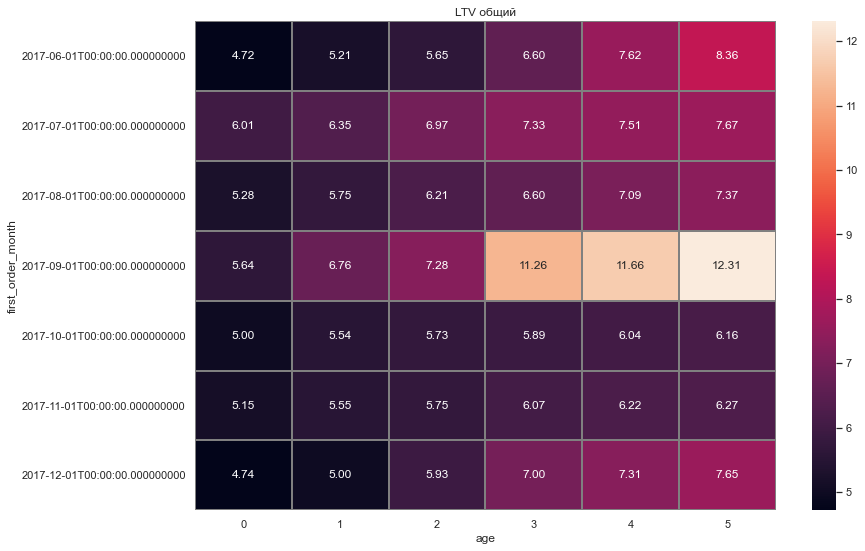

In [67]:
plt.figure(figsize=(13, 9))
plt.title('LTV общий')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

**Таким образом выяснили сколько приносит клиент денег нашей компании в зависимости от его принадлежности к когорте. Наиболее привликательно выглядят клиенты из сентябрьской когорты. Можно сделать вывод, что маркетинговые действия предпринятые нами в этом месяце оказывают наиболее положительный результат**

Теперь расчитаем CAC

In [68]:
report_new = pd.merge(report, monthlycosts, left_on='first_order_month', right_on='month')
report_new.head()

,first_order_month,n_buyers,month,revenue,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0


In [69]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
cac = report_new[['first_order_month', 'ltv', 'cac']]
cac

,first_order_month,ltv,cac
0,2017-06-01,4.724414,8.905091
1,2017-06-01,0.485329,8.905091
2,2017-06-01,0.437637,8.905091
3,2017-06-01,0.954671,8.905091
4,2017-06-01,1.022531,8.905091
5,2017-06-01,0.735502,8.905091
6,2017-07-01,6.010218,9.485486
7,2017-07-01,0.335211,9.485486
8,2017-07-01,0.623531,9.485486
9,2017-07-01,0.358976,9.485486


In [70]:
cac.groupby('first_order_month')['cac'].mean()

first_order_month
2017-06-01     8.905091
2017-07-01     9.485486
2017-08-01    10.796015
2017-09-01     9.441654
2017-10-01     8.369327
2017-11-01     9.288870
2017-12-01     8.741809
Name: cac, dtype: float64

**Делаем вывод о том, что стоимость привлечения клиентов августовской когорты наиболее велика, хотя LTV этой когорты было менее выдающимся чем в сентябре. Вероятно, нами были выбраны неверные маркетинговые мероприятия в тот месяц**

Далее расчитаем ROMI

In [71]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output = output.cumsum(axis=1).round(2)

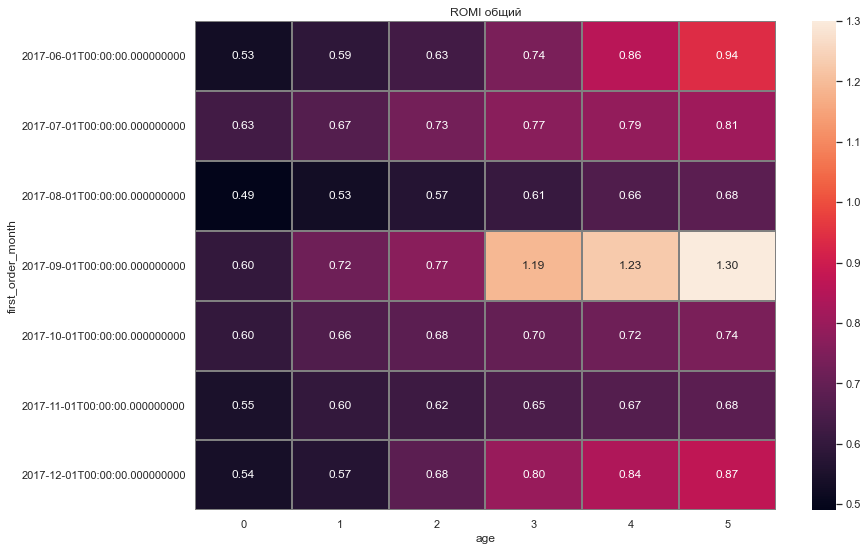

In [72]:
plt.figure(figsize=(13, 9))
plt.title('ROMI общий')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

In [73]:
output.mean(axis=0).round(2)

age
0    0.56
1    0.62
2    0.67
3    0.78
4    0.82
5    0.86
dtype: float64

**В рассматриваемом периоде 6 месяцев окупилась только сентябрьская когорта**

Теперь исследуем эти же метрики, рассматривая разные устройства пользователей

In [74]:
visits.head()

,device,end,source,start,uid,duration,firststart,firstmonth,firstday,firstweek,session_year,session_month,session_week,session_date,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017-12-20 17:20:00,2017-12-01,2017-12-20,2017-12-14,2017,12,51,2017-12-20,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,2018-02-19 16:53:00,2018-02-01,2018-02-19,2018-02-15,2018,2,8,2018-02-19,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-06-29,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,5,20,2018-05-20,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680.0,2018-03-09 20:05:00,2018-03-01,2018-03-09,2018-03-08,2018,3,10,2018-03-09,0


In [75]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [76]:
device = visits.groupby('uid')['device'].first()
device

uid
11863502262781            touch
49537067089222            touch
297729379853735         desktop
313578113262317         desktop
325320750514679         desktop
                         ...   
18446403737806311543    desktop
18446424184725333426      touch
18446556406699109058      touch
18446621818809592527    desktop
18446676030785672386    desktop
Name: device, Length: 228169, dtype: object

In [77]:
touch = device.loc[device == 'touch']
touch

uid
11863502262781          touch
49537067089222          touch
397399764396656         touch
801587065806307         touch
1091316338292477        touch
                        ...  
18445747027901320564    touch
18445867588706195862    touch
18445884613277162497    touch
18446424184725333426    touch
18446556406699109058    touch
Name: device, Length: 67222, dtype: object

In [78]:
orders_new_touch = pd.merge(orders_new,touch, on='uid')
orders_new_touch

,buy,revenue,uid,month,first_order_month,device
0,2017-06-01 10:58:00,3.73,11062788618907079633,2017-06-01,2017-06-01,touch
1,2017-06-01 17:19:00,0.55,7939977454700153907,2017-06-01,2017-06-01,touch
2,2017-06-01 17:20:00,2.08,13476545380596382515,2017-06-01,2017-06-01,touch
3,2017-06-01 17:33:00,11.00,16674220541096562302,2017-06-01,2017-06-01,touch
4,2017-06-27 23:24:00,3.05,16674220541096562302,2017-06-01,2017-06-01,touch
...,...,...,...,...,...,...
9506,2018-05-31 21:45:00,1.83,8872955060259645931,2018-05-01,2018-05-01,touch
9507,2018-05-31 21:48:00,5.50,10394363694271133241,2018-05-01,2018-05-01,touch
9508,2018-05-31 22:16:00,7.33,9985845906947650101,2018-05-01,2018-05-01,touch
9509,2018-05-31 23:01:00,0.24,8971807372263051413,2018-05-01,2018-05-01,touch


In [79]:
cohorts_touch = orders_new_touch.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
cohorts_touch

,first_order_month,month,revenue
0,2017-06-01,2017-06-01,1385.45
1,2017-06-01,2017-07-01,129.52
2,2017-06-01,2017-08-01,49.50
3,2017-06-01,2017-09-01,26.21
4,2017-06-01,2017-10-01,126.87
...,...,...,...
73,2018-03-01,2018-04-01,528.36
74,2018-03-01,2018-05-01,216.57
75,2018-04-01,2018-04-01,1878.58
76,2018-04-01,2018-05-01,49.44


In [80]:
first_orders_touch = orders_new_touch.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders_touch.columns = ['uid', 'first_order_month']
first_orders_touch

,uid,first_order_month
0,1575281904278712,2017-06-01
1,3077748354309989,2018-03-01
2,4992223027560440,2018-04-01
3,12695041396440380,2017-09-01
4,15930622431697628,2017-11-01
...,...,...
7296,18428994745177004293,2017-06-01
7297,18436524371700707921,2017-09-01
7298,18436668870808047386,2018-02-01
7299,18442290965339407211,2018-02-01


In [81]:
cohort_sizes_touch = first_orders_touch.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes_touch.columns = ['first_order_month', 'n_buyers']
cohort_sizes_touch

,first_order_month,n_buyers
0,2017-06-01,347
1,2017-07-01,415
2,2017-08-01,257
3,2017-09-01,520
4,2017-10-01,821
5,2017-11-01,753
6,2017-12-01,880
7,2018-01-01,704
8,2018-02-01,818
9,2018-03-01,733


In [82]:
report_touch = pd.merge(cohort_sizes_touch, cohorts_touch, on='first_order_month')
report_touch

,first_order_month,n_buyers,month,revenue
0,2017-06-01,347,2017-06-01,1385.45
1,2017-06-01,347,2017-07-01,129.52
2,2017-06-01,347,2017-08-01,49.50
3,2017-06-01,347,2017-09-01,26.21
4,2017-06-01,347,2017-10-01,126.87
...,...,...,...,...
73,2018-03-01,733,2018-04-01,528.36
74,2018-03-01,733,2018-05-01,216.57
75,2018-04-01,429,2018-04-01,1878.58
76,2018-04-01,429,2018-05-01,49.44


In [83]:
report_touch['age'] = (report_touch['month'] - report_touch['first_order_month']) / np.timedelta64(1, 'M')
report_touch['age'] = report_touch['age'].round().astype('int')
report_touch['ltv'] = report_touch['revenue'] / report_touch['n_buyers']
report_touch = report_touch.loc[(report_touch['first_order_month'] < '2018-01-01') & (report_touch['age'] < 6)]
report_touch

,first_order_month,n_buyers,month,revenue,age,ltv
0,2017-06-01,347,2017-06-01,1385.45,0,3.992651
1,2017-06-01,347,2017-07-01,129.52,1,0.373256
2,2017-06-01,347,2017-08-01,49.50,2,0.142651
3,2017-06-01,347,2017-09-01,26.21,3,0.075533
4,2017-06-01,347,2017-10-01,126.87,4,0.365620
5,2017-06-01,347,2017-11-01,51.02,5,0.147032
12,2017-07-01,415,2017-07-01,2580.90,0,6.219036
13,2017-07-01,415,2017-08-01,89.68,1,0.216096
14,2017-07-01,415,2017-09-01,17.10,2,0.041205
15,2017-07-01,415,2017-10-01,84.37,3,0.203301


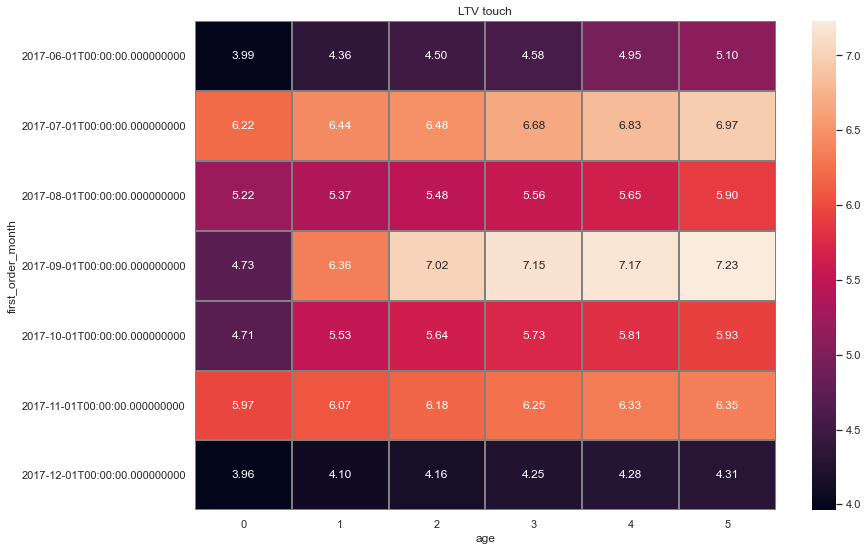

In [84]:
output = report_touch.pivot_table( 
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
output = output.cumsum(axis = 1)
plt.figure(figsize=(13, 9))
plt.title('LTV touch')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

Далее CAC и ROMI для touch

In [85]:
k = visits['device'].value_counts()/(visits['device'].value_counts()[0]+visits['device'].value_counts()[1])
k

desktop    0.73057
touch      0.26943
Name: device, dtype: float64

In [86]:
report_new_touch = pd.merge(report_touch, monthlycosts, left_on='first_order_month', right_on='month')
report_new_touch['cac'] = report_new_touch['costs'] / report_new_touch['n_buyers']*k[1]
report_new_touch.head()

,first_order_month,n_buyers,month,revenue,age,ltv,costs,cac
0,2017-06-01,347,2017-06-01,1385.45,0,3.992651,18015.0,13.987822
1,2017-06-01,347,2017-07-01,129.52,1,0.373256,18015.0,13.987822
2,2017-06-01,347,2017-08-01,49.50,2,0.142651,18015.0,13.987822
3,2017-06-01,347,2017-09-01,26.21,3,0.075533,18015.0,13.987822
4,2017-06-01,347,2017-10-01,126.87,4,0.365620,18015.0,13.987822


In [87]:
report_new_touch.groupby('first_order_month')['cac'].mean()

first_order_month
2017-06-01    13.987822
2017-07-01    11.842301
2017-08-01    15.505873
2017-09-01    12.626357
2017-10-01    11.920170
2017-11-01    13.563752
2017-12-01    11.731011
Name: cac, dtype: float64

age
0    0.385014
1    0.423883
2    0.437645
3    0.445929
4    0.454720
5    0.462952
dtype: float64


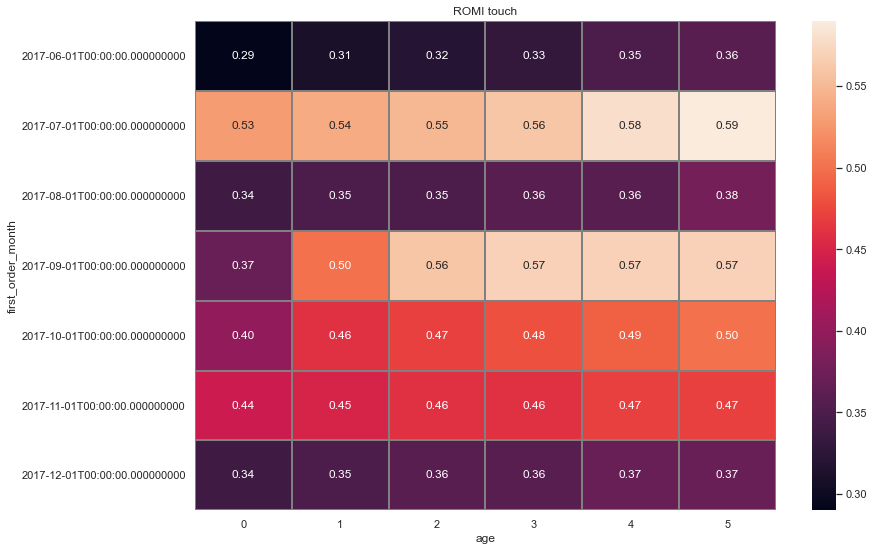

In [88]:
report_new_touch['romi'] = report_new_touch['ltv'] / report_new_touch['cac']
output = report_new_touch.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
print(output.mean(axis=0).cumsum())

output = output.cumsum(axis=1).round(2)
plt.figure(figsize=(13, 9))
plt.title('ROMI touch')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

**У данного источника CAC заметно превышает CAC общий, а LTV наоборот меньше общего. От того и ROMI не достигает 1 за весь изучаемый период**

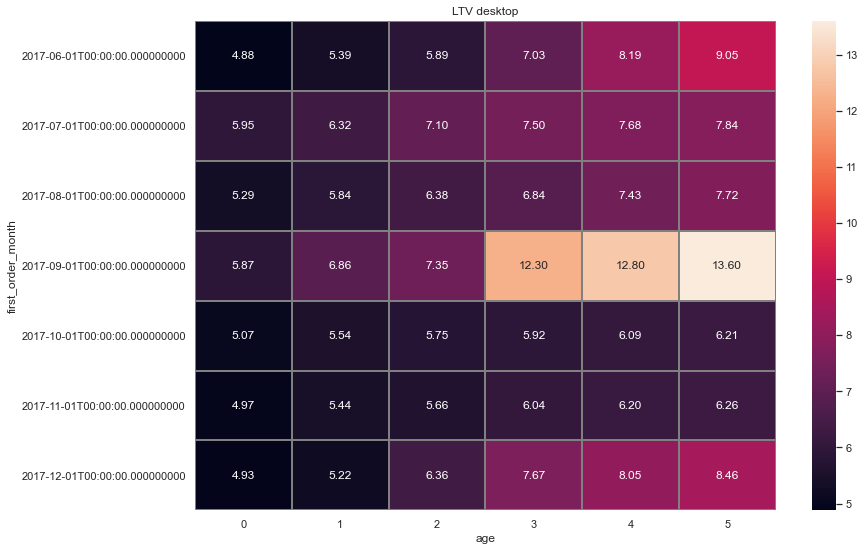

In [89]:
desktop = device.loc[device == 'desktop']
orders_new_desktop = pd.merge(orders_new,desktop, on='uid')
cohorts_desktop = orders_new_desktop.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
first_orders_desktop = orders_new_desktop.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders_desktop.columns = ['uid', 'first_order_month']
cohort_sizes_desktop = first_orders_desktop.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes_desktop.columns = ['first_order_month', 'n_buyers']
report_desktop = pd.merge(cohort_sizes_desktop, cohorts_desktop, on='first_order_month')
report_desktop['age'] = (report_desktop['month'] - report_desktop['first_order_month']) / np.timedelta64(1, 'M')
report_desktop['age'] = report_desktop['age'].round().astype('int')
report_desktop['ltv'] = report_desktop['revenue'] / report_desktop['n_buyers']
report_desktop = report_desktop.loc[(report_desktop['first_order_month'] < '2018-01-01') & (report_desktop['age'] < 6)]
output = report_desktop.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
output = output.cumsum(axis = 1)
plt.figure(figsize=(13, 9))
plt.title('LTV desktop')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

In [90]:
report_new_desktop = pd.merge(report_desktop, monthlycosts, left_on='first_order_month', right_on='month')
report_new_desktop['cac'] = report_new_desktop['costs'] / report_new_desktop['n_buyers']*k[0]
report_new_desktop.head()

,first_order_month,n_buyers,month,revenue,age,ltv,costs,cac
0,2017-06-01,1676,2017-06-01,8172.04,0,4.875919,18015.0,7.85276
1,2017-06-01,1676,2017-07-01,852.30,1,0.508532,18015.0,7.85276
2,2017-06-01,1676,2017-08-01,835.84,2,0.498711,18015.0,7.85276
3,2017-06-01,1676,2017-09-01,1905.09,3,1.136689,18015.0,7.85276
4,2017-06-01,1676,2017-10-01,1941.71,4,1.158538,18015.0,7.85276


age
0    0.629529
1    0.691202
2    0.757049
3    0.906126
4    0.959883
5    1.006259
dtype: float64


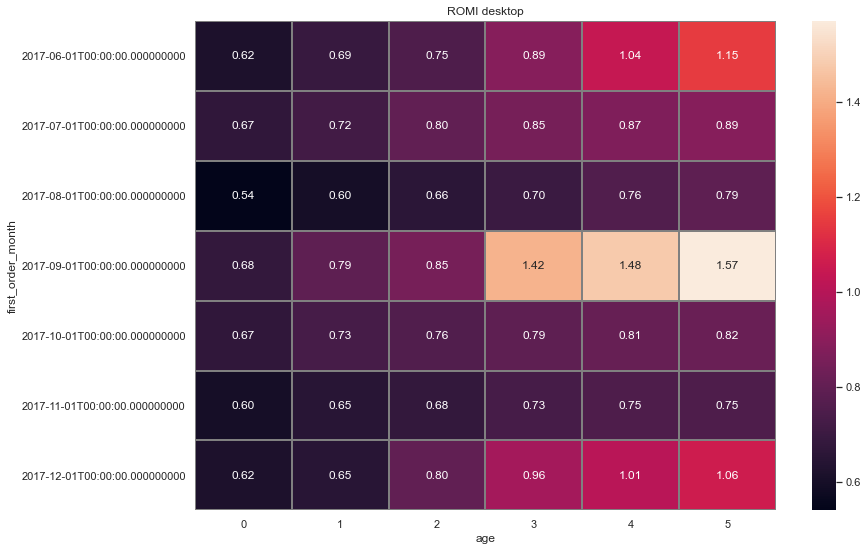

In [91]:
report_new_desktop['romi'] = report_new_desktop['ltv'] / report_new_desktop['cac']
output = report_new_desktop.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
print(output.mean(axis=0).cumsum())
output = output.cumsum(axis=1).round(2)
plt.figure(figsize=(13, 9))
plt.title('ROMI desktop')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

**Делаем вывод, что десктоп версия начинает приносить доход, начиная с 6 месяца. В тоже время touch версия не делает этого за весь период. Наиболее прибыльными являются июньская, сентябрьская и декабрьская когорта, хотя сентябрьская выделяется наиболее выгодно**

In [92]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [93]:
sources = costs['source_id'].value_counts()
sources.index

Int64Index([5, 9, 3, 1, 10, 4, 2], dtype='int64')

**Автоматизируем процесс, описанный выше, по поиску ROMI, CAC и LTV, но в данном случае будем делать это рассматривая различные источники рекламы. Будем перебирать циклом из sources.index**

CAC для 5 источника следующий
first_order_month
2017-06-01    4.581646
2017-07-01    5.005242
2017-08-01    4.719827
2017-09-01    4.465360
2017-10-01    4.304030
2017-11-01    5.724290
2017-12-01    5.271562
Name: cac, dtype: float64
CAC для 9 источника следующий
first_order_month
2017-06-01    1.550109
2017-07-01    1.939359
2017-08-01    1.555812
2017-09-01    1.872162
2017-10-01    1.599501
2017-11-01    1.691040
2017-12-01    1.923918
Name: cac, dtype: float64
CAC для 3 источника следующий
first_order_month
2017-06-01     8.846281
2017-07-01    10.733385
2017-08-01    12.512301
2017-09-01     9.663967
2017-10-01     9.702367
2017-11-01    10.152260
2017-12-01     9.359215
Name: cac, dtype: float64
CAC для 1 источника следующий
first_order_month
2017-06-01    2.807007
2017-07-01    2.682200
2017-08-01    3.304896
2017-09-01    2.855532
2017-10-01    2.780012
2017-11-01    2.590212
2017-12-01    2.592691
Name: cac, dtype: float64
CAC для 10 источника следующий
first_order_month
2017

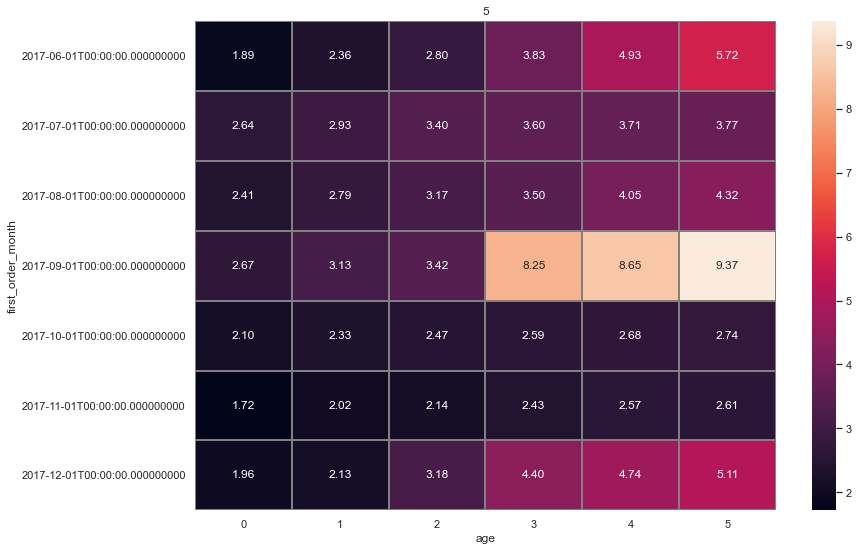

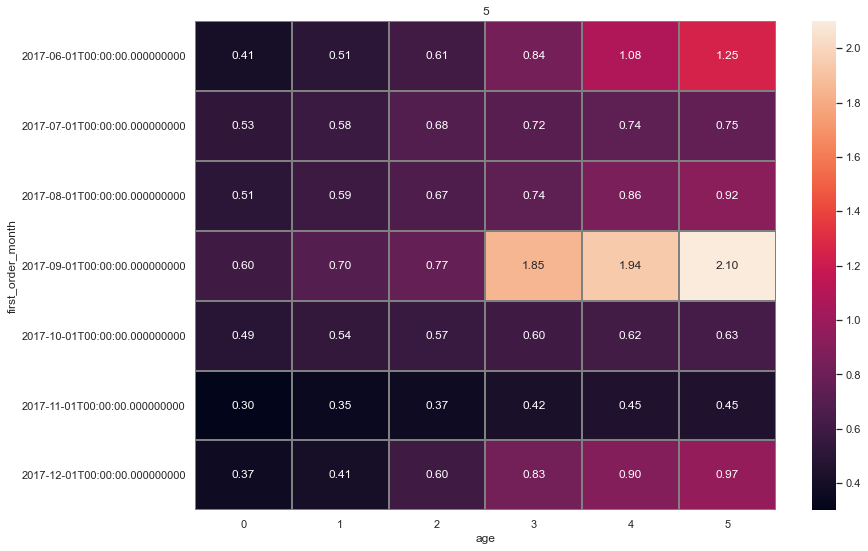

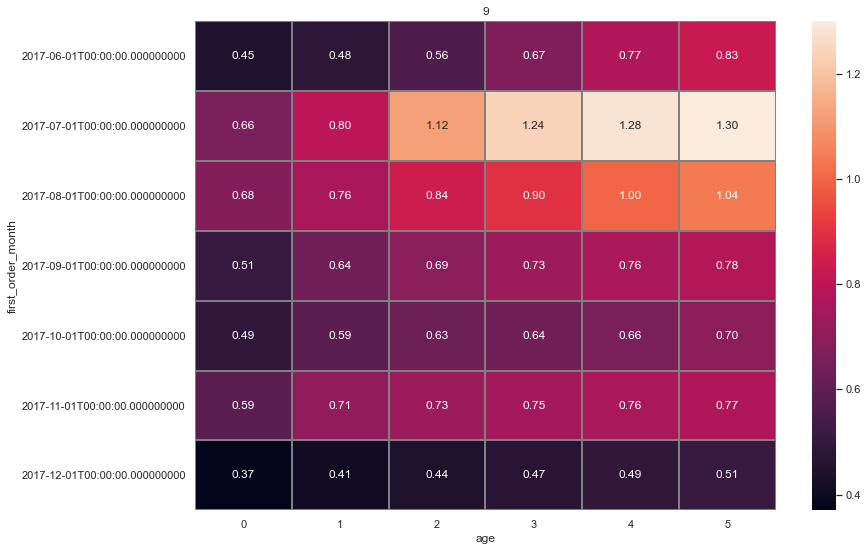

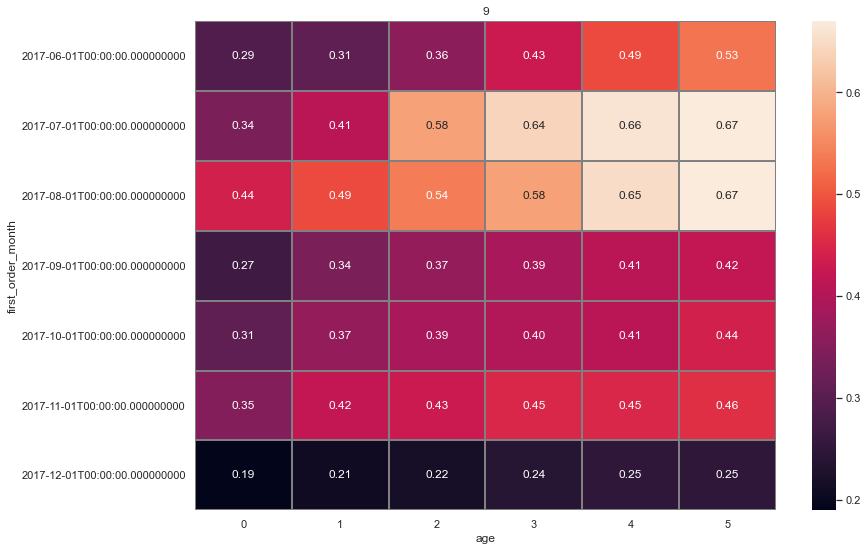

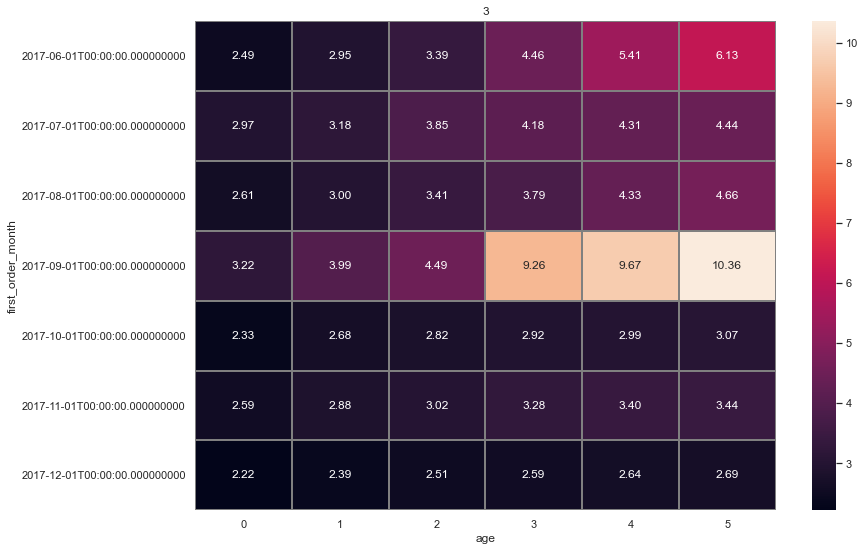

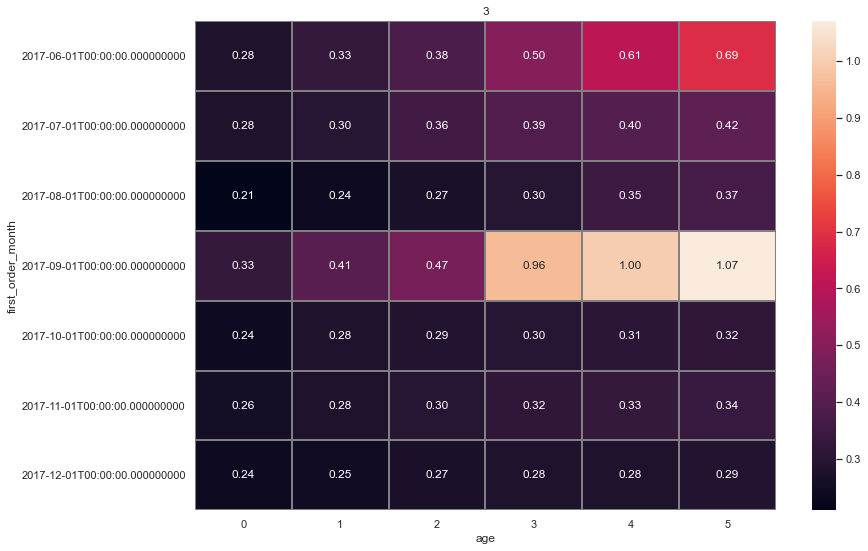

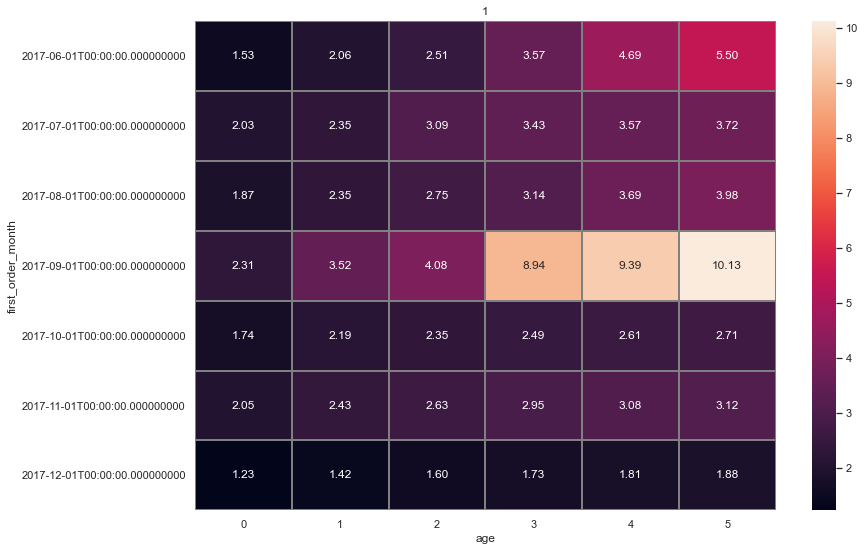

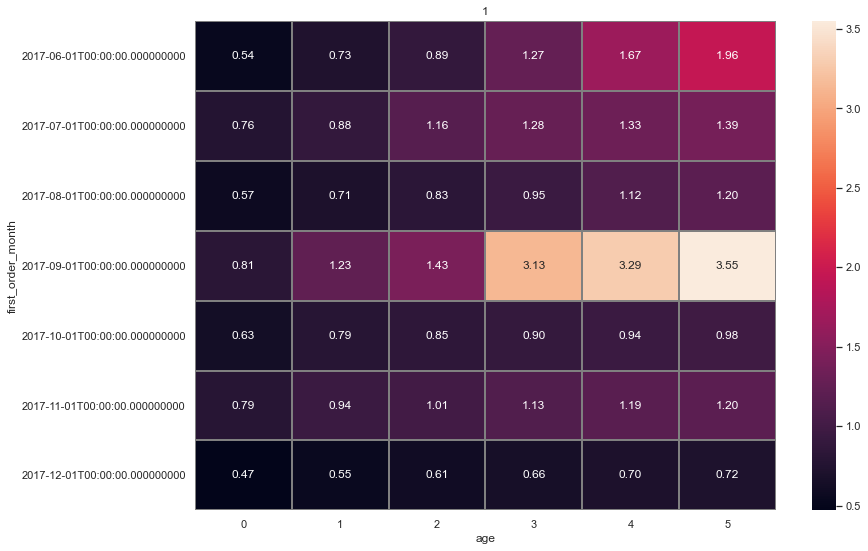

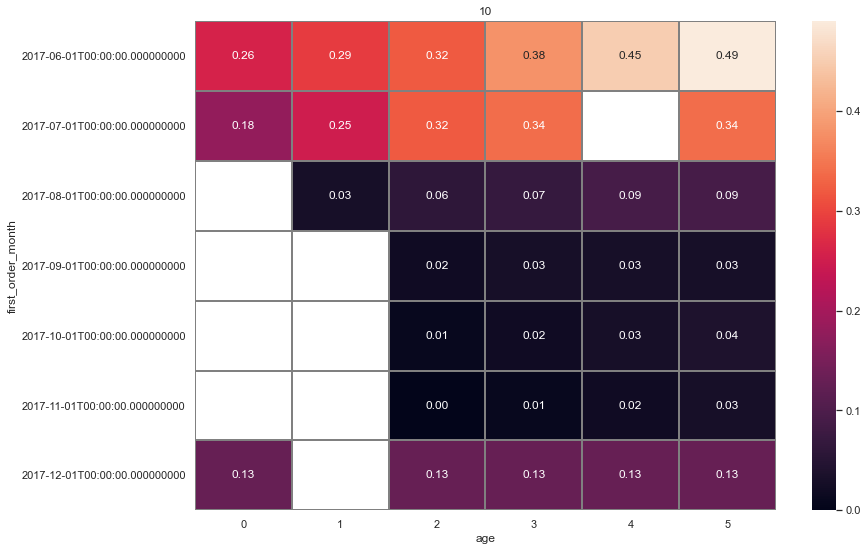

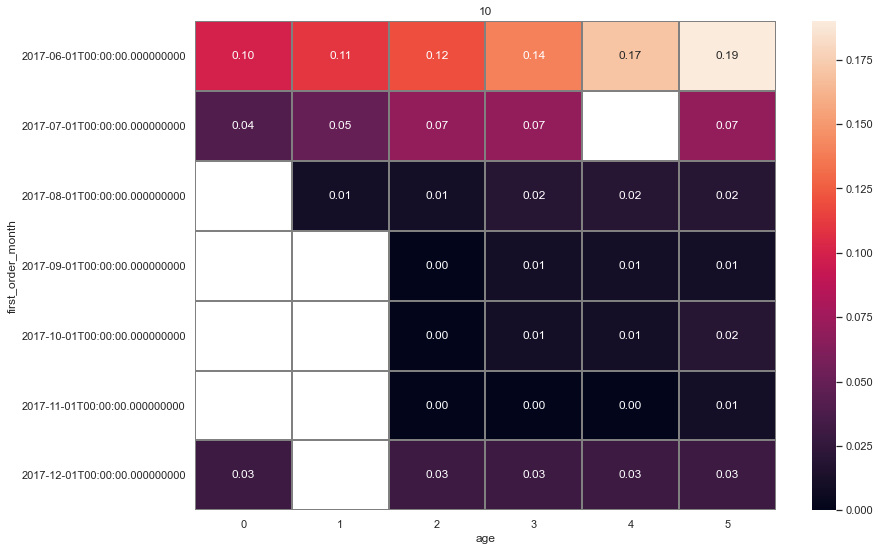

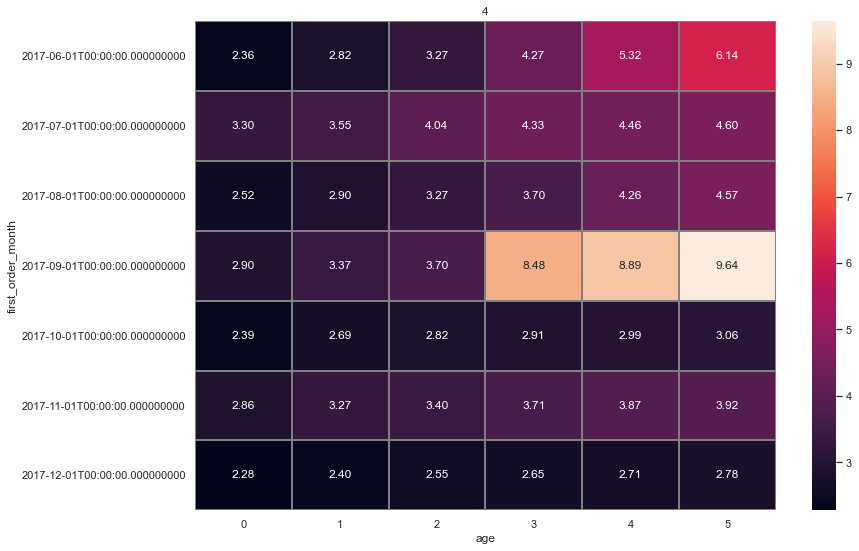

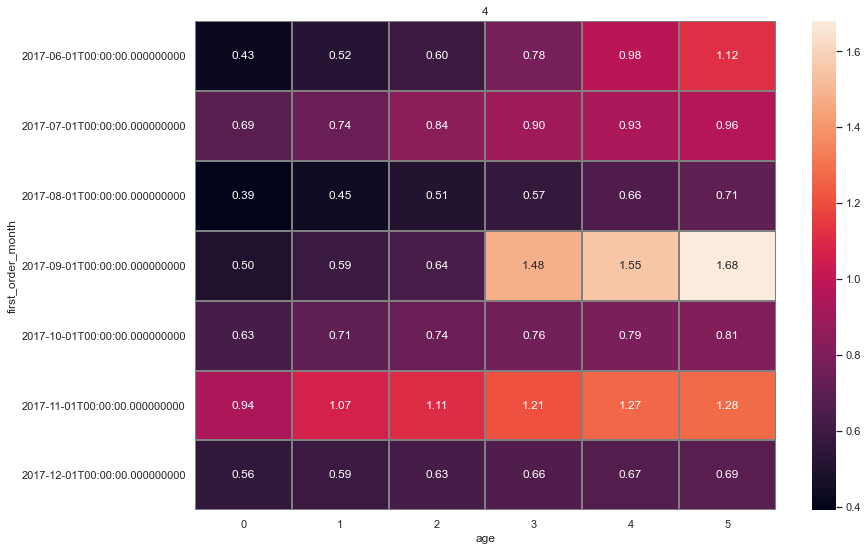

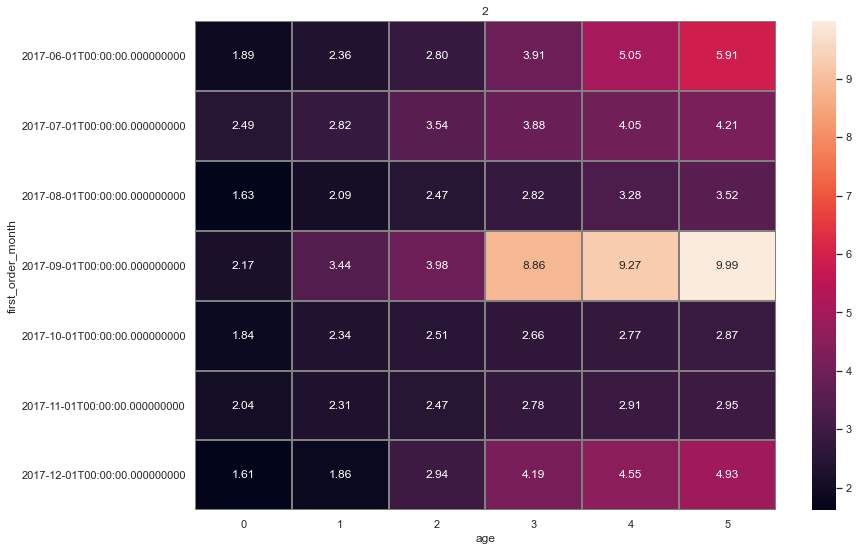

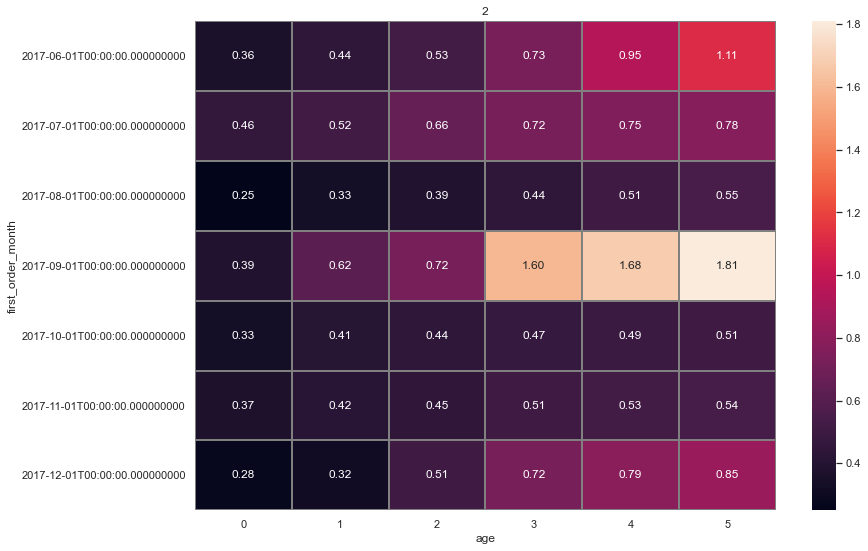

In [94]:
buy = buy[['source','uid']]
for i in sources.index:    
    b = buy.loc[buy['source'] == i]
    b = b.groupby('uid').mean()
    orderssource = orders_new.merge(b, on = 'uid')
    cohortssource = orderssource.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
    first_orders_source = orderssource.groupby('uid').agg({'month': 'min'}).reset_index()
    first_orders_source.columns = ['uid', 'first_order_month']
    cohort_sizes_source = first_orders_source.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes_source.columns = ['first_order_month', 'n_buyers']
    report_source = pd.merge(cohort_sizes_source, cohortssource, on='first_order_month')
    report_source['age'] = (report_source['month'] - report_source['first_order_month']) / np.timedelta64(1, 'M')
    report_source['age'] = report_source['age'].round().astype('int')
    report_source['ltv'] = report_source['revenue'] / report_desktop['n_buyers']
    report_source = report_source.loc[(report_source['first_order_month'] < '2018-01-01') & (report_source['age'] < 6)]
    output = report_source.pivot_table(
            index='first_order_month', 
            columns='age', 
            values='ltv', 
            aggfunc='mean').round(2)
    output = output.cumsum(axis = 1)
    plt.figure(figsize=(13, 9))
    plt.title(i)
    sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    a = costs.loc[costs['source_id'] == i]
    monthlycosts = a.groupby('month')['costs'].sum()
    report_new = pd.merge(report_source, monthlycosts, left_on='first_order_month', right_on='month')
    
    report_new['cac'] = report_new['costs'] / report_new['n_buyers']
    print('CAC для', i , 'источника следующий')
    print(report_new.groupby('first_order_month')['cac'].mean())
    report_new['romi'] = report_new['ltv'] / report_new['cac']
    output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

    output = output.cumsum(axis=1).round(2)
    plt.figure(figsize=(13, 9))
    plt.title(i)

    sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

In [95]:
for i in sources.index:
    b = buy.loc[buy['source'] == i]
    b = b.groupby('uid').mean()
    orderssource = orders_new.merge(b, on = 'uid')
    cohortssource = orderssource.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
    first_orders_source = orderssource.groupby('uid').agg({'month': 'min'}).reset_index()
    first_orders_source.columns = ['uid', 'first_order_month']
    cohort_sizes_source = first_orders_source.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes_source.columns = ['first_order_month', 'n_buyers']
    report_source = pd.merge(cohort_sizes_source, cohortssource, on='first_order_month')
    report_source['age'] = (report_source['month'] - report_source['first_order_month']) / np.timedelta64(1, 'M')
    report_source['age'] = report_source['age'].round().astype('int')
    report_source['ltv'] = report_source['revenue'] / report_desktop['n_buyers']
    report_source = report_source.loc[(report_source['first_order_month'] < '2018-01-01') & (report_source['age'] < 6)]
    output = report_source.pivot_table(
            index='first_order_month', 
            columns='age', 
            values='ltv', 
            aggfunc='mean').round(2)
    print('средний LTV для', i , 'источника следующий')

    print(output.mean(axis=0))
    a = costs.loc[costs['source_id'] == i]
    monthlycosts = a.groupby('month')['costs'].sum()
    report_new = pd.merge(report_source, monthlycosts, left_on='first_order_month', right_on='month')
    
    report_new['cac'] = report_new['costs'] / report_new['n_buyers']
    print('CAC для', i , 'источника следующий')
    print(report_new.groupby('first_order_month')['cac'].mean())
    report_new['romi'] = report_new['ltv'] / report_new['cac']
    output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

    output = output.cumsum(axis=1).round(2)
    print('средний ROMI для', i , 'источника следующий')
    print(output.mean(axis=0))

    

средний LTV для 5 источника следующий
age
0    2.198571
1    0.328571
2    0.412857
3    1.145714
4    0.390000
5    0.330000
dtype: float64
CAC для 5 источника следующий
first_order_month
2017-06-01    4.581646
2017-07-01    5.005242
2017-08-01    4.719827
2017-09-01    4.465360
2017-10-01    4.304030
2017-11-01    5.724290
2017-12-01    5.271562
Name: cac, dtype: float64
средний ROMI для 5 источника следующий
age
0    0.458571
1    0.525714
2    0.610000
3    0.857143
4    0.941429
5    1.010000
dtype: float64
средний LTV для 9 источника следующий
age
0    0.535714
1    0.091429
2    0.088571
3    0.055714
4    0.045714
5    0.030000
dtype: float64
CAC для 9 источника следующий
first_order_month
2017-06-01    1.550109
2017-07-01    1.939359
2017-08-01    1.555812
2017-09-01    1.872162
2017-10-01    1.599501
2017-11-01    1.691040
2017-12-01    1.923918
Name: cac, dtype: float64
средний ROMI для 9 источника следующий
age
0    0.312857
1    0.364286
2    0.412857
3    0.447143
4    0.

**Анализируя, полученные значения среднего ROMI, делаем вывод, что прибыльными источниками в изучаемом периоде являются - 4, 1, 5. 2 источник тоже показывает положительную динамику, но за 6 месяцев окупиться не успел. 3 источник достигает за период среднего ROMI 0.5, а значит явно не попадает в список рекомендуемых к дальнейшему использованию. 10 источник это наше самое слабое место, в текущих реалиях врядли есть перспектива, что он когда либо достигнет окупаемости.**

# Выводы

<br />Провели проект по анализу маркетинговых затрах Яндекс Афиши.<br />
<br />В среднем люди совершают не более 3 заказов за весь свой lifetime, причем первый заказ они оформляют спустя чуть более чем четверть часа. Средняя продолжительность сессии составляет 300 секунд, а средний чек равен 5.<br />
<br />В целом наш продукт начинает приносить прибыль с 8 месяца. Он реализован на 2-х платформах - десктоп и тач. Маркетологам стоит либо что-то придумать со второй, либо выбрать курс на уменьшение ее доли, т.к. она убыточна.<br />
<br />Затраты на 3 источник составляют большую часть общих завтрат и равны 141321, соответственно, было ожидание увидеть этот источник в лидерах по нашим метрикам, иначе почему мы выбрали такое распеределени затрат. Этот источник не успевает себя окупить за период. Вероятно есть смысл перераспределить потоки д/с, т.к. есть гораздо более привлекательные источники.<br />
<br />Определенно,источники 4, 1, 5 являются фаворитами, т.к. в изучаемом периоде сумели перевалить ROMI равное 1. От 10 источ ника надо отказаться как можно раньше<br />
<br />Итак, резюмируя, мы можем дать слердующие рекомендации: минимизировать расходы на touch и 10 источник. За счет этого, увеличить расходы на desktop и 1 источник, потому что он является безусловным лидером по росту ROMI<br />


